In [14]:
import random

def toss_coin():
    """
    Simulate a single coin toss.
    Returns 'H' for heads and 'T' for tails.
    """
    # random.random() returns a float in the interval [0.0, 1.0).
    if random.random() < 0.5:
        return 'H'
    else:
        return 'T'

def simulate_coin_tosses(num_tosses):
    """
    Simulate tossing a fair coin num_tosses times.
    Returns a dictionary with the counts of heads and tails.
    """
    results = {'H': 0, 'T': 0}

    for _ in range(num_tosses):
        outcome = toss_coin()
        results[outcome] += 1
    
    return results

if __name__ == "__main__":
    # Number of tosses
    n = 1000
    
    # Run the simulation
    counts = simulate_coin_tosses(n)
    
    # Calculate probabilities (frequencies)
    p_heads = counts['H'] / n
    p_tails = counts['T'] / n
    
    # Print results
    print(f"Total tosses: {n}")
    print(f"Heads count: {counts['H']}, Tails count: {counts['T']}")
    print(f"Empirical probability of Heads: {p_heads:.3f}")
    print(f"Empirical probability of Tails: {p_tails:.3f}")


Total tosses: 1000
Heads count: 486, Tails count: 514
Empirical probability of Heads: 0.486
Empirical probability of Tails: 0.514


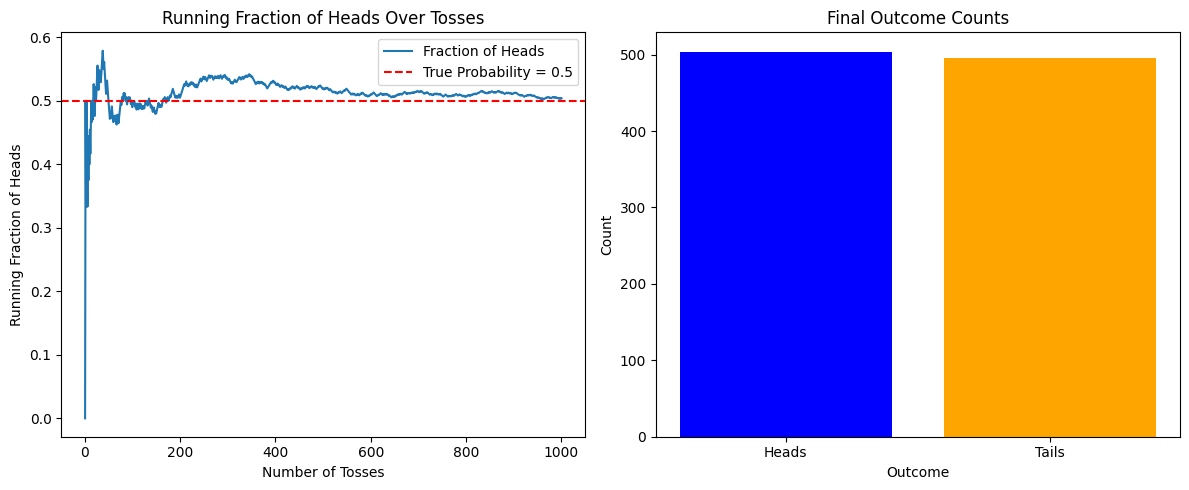

In [15]:
import random
import matplotlib.pyplot as plt

def toss_coin():
    """
    Simulate a single coin toss of a fair coin.
    Returns 'H' for heads and 'T' for tails.
    """
    return 'H' if random.random() < 0.5 else 'T'

def simulate_and_plot(n):
    """
    Simulate n tosses of a fair coin and create two plots:
    1) Running fraction of Heads
    2) Final outcome counts (Heads, Tails)
    """
    
    outcomes = []
    running_fraction_heads = []
    
    heads_count = 0
    
    # Simulate n tosses
    for i in range(n):
        outcome = toss_coin()
        outcomes.append(outcome)
        
        if outcome == 'H':
            heads_count += 1
        
        # Fraction of heads after (i+1) tosses
        running_fraction_heads.append(heads_count / (i + 1))
    
    # ---- PLOTTING ----
    plt.figure(figsize=(12, 5))
    
    # 1. Plot the running fraction of Heads
    plt.subplot(1, 2, 1)
    plt.plot(range(1, n + 1), running_fraction_heads, label="Fraction of Heads")
    plt.axhline(0.5, color='red', linestyle='--', label="True Probability = 0.5")
    plt.xlabel("Number of Tosses")
    plt.ylabel("Running Fraction of Heads")
    plt.title("Running Fraction of Heads Over Tosses")
    plt.legend()
    
    # 2. Plot a bar chart of the final counts
    plt.subplot(1, 2, 2)
    final_counts = [outcomes.count('H'), outcomes.count('T')]
    plt.bar(["Heads", "Tails"], final_counts, color=["blue", "orange"])
    plt.title("Final Outcome Counts")
    plt.xlabel("Outcome")
    plt.ylabel("Count")
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Run the simulation and plotting
if __name__ == "__main__":
    n_tosses = 1000
    simulate_and_plot(n_tosses)


Tosses: 100, P(H): 0.2700
Tosses: 10000, P(H): 0.2956
Tosses: 100000, P(H): 0.2999
Tosses: 1000000, P(H): 0.3000


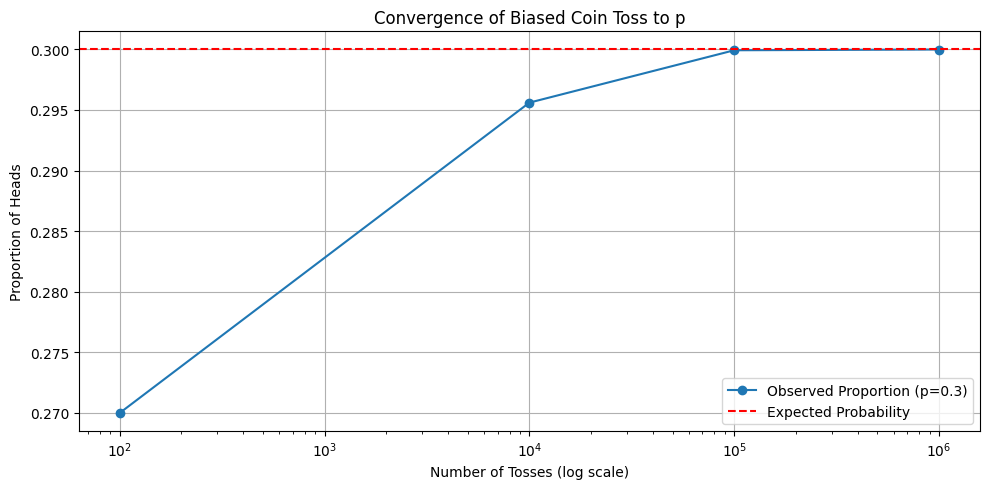

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate biased coin tosses and calculate final proportion
def simulate_coin_convergence(prob_head: float, toss_counts: list[int]):
    proportions = []
    for n in toss_counts:
        tosses = [1 if random.random() < prob_head else 0 for _ in range(n)]
        proportion_heads = sum(tosses) / n
        proportions.append(proportion_heads)
        print(f"Tosses: {n}, P(H): {proportion_heads:.4f}")
    return proportions

# Toss scales to simulate
toss_scales = [100, 10_000, 100_000, 1_000_000]
bias_p = 0.3  # Biased coin (not 0.5)

# Run simulation
proportions = simulate_coin_convergence(bias_p, toss_scales)

# Plotting convergence
plt.figure(figsize=(10, 5))
plt.plot(toss_scales, proportions, marker='o', label=f"Observed Proportion (p={bias_p})")
plt.axhline(y=bias_p, color='r', linestyle='--', label="Expected Probability")
plt.xscale('log')
plt.xlabel("Number of Tosses (log scale)")
plt.ylabel("Proportion of Heads")
plt.title("Convergence of Biased Coin Toss to p")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Class Example

In [17]:
# Given values
P_industrious = 0.1
P_not_industrious = 0.9
P_A_given_industrious = 0.7
P_A_given_not_industrious = 0.3  # assumed

# Total probability of A
P_A = (P_A_given_industrious * P_industrious) + (P_A_given_not_industrious * P_not_industrious)

# Apply Bayes’ Rule
P_industrious_given_A = (P_A_given_industrious * P_industrious) / P_A

# Output
print(f"P(industrious | A) = {P_industrious_given_A:.4f}")


P(industrious | A) = 0.2059


# The counting rule: example 1

In [18]:
import math

# Total number of 5-card poker hands
total_hands = math.comb(52, 5)

# Number of flushes in a single suit (e.g., hearts)
flushes_per_suit = math.comb(13, 5)

# Total flushes (hearts, spades, diamonds, clubs)
total_flushes = 4 * flushes_per_suit

# Probability of a flush
P_flush = total_flushes / total_hands

# Output
print(f"Total Hands: {total_hands}")
print(f"Total Flushes: {total_flushes}")
print(f"P(flush) = {P_flush:.8f}")


Total Hands: 2598960
Total Flushes: 5148
P(flush) = 0.00198079


# Class Example 2

In [19]:
# Given
P_industrious = 0.1
P_not_industrious = 0.9
P_A_given_industrious = 0.7
P_A_given_not_industrious = 0.3  # Assumed

# Total probability of getting an A
P_A = (P_A_given_industrious * P_industrious) + (P_A_given_not_industrious * P_not_industrious)

# Bayes' Theorem
P_industrious_given_A = (P_A_given_industrious * P_industrious) / P_A

# Print results
print(f"P(A) = {P_A:.4f}")
print(f"P(industrious | A) = {P_industrious_given_A:.4f}")


P(A) = 0.3400
P(industrious | A) = 0.2059


In [20]:
# Given values
P_industrious = 0.1
P_not_industrious = 0.9
P_A_given_industrious = 0.7
P_A_given_not_industrious = 0.3  # assumed/estimated

# Rule of Total Probability
P_A = (P_A_given_industrious * P_industrious) + (P_A_given_not_industrious * P_not_industrious)

# Bayes' Theorem
P_industrious_given_A = (P_A_given_industrious * P_industrious) / P_A

# Print results
print(f"Step 1: P(A) = P(A|I)*P(I) + P(A|¬I)*P(¬I) = {P_A:.4f}")
print(f"Step 2: P(industrious | A)=P(I|A) = P(A|I)*P(I) / P(A) = {P_industrious_given_A:.4f}")


Step 1: P(A) = P(A|I)*P(I) + P(A|¬I)*P(¬I) = 0.3400
Step 2: P(industrious | A)=P(I|A) = P(A|I)*P(I) / P(A) = 0.2059


# Exercise 1

In [21]:
# Assumed inputs
P_vaccinated = 0.9              # 90% of population is vaccinated
P_unvaccinated = 0.1
P_vaccinated_given_hospital = 0.6  # P(a|h)

# Assumed hospitalization rates (hypothetical data to make P(a|h) = 0.6)
P_hospital_given_vaccinated = 0.001
P_hospital_given_unvaccinated = 0.02

# Rule of Total Probability
P_hospital = (
    P_hospital_given_vaccinated * P_vaccinated +
    P_hospital_given_unvaccinated * P_unvaccinated
)

# Apply Bayes' Theorem
P_vaccinated_given_h = (
    P_hospital_given_vaccinated * P_vaccinated
) / P_hospital

# Output
print(f"P(hospital) = {P_hospital:.4f}")
print(f"P(vaccinated | hospital) = {P_vaccinated_given_h:.4f}")


P(hospital) = 0.0029
P(vaccinated | hospital) = 0.3103


# Exercise 2

In [22]:
# Total number of 5-card poker hands
total_hands = 2598960

# Raw counts
flushes = 5148
straights = 10200
straight_flushes = 40

# Individual probabilities
P_flush = flushes / total_hands
P_straight = straights / total_hands
P_both = straight_flushes / total_hands

# Inclusion-Exclusion
P_straight_or_flush = P_straight + P_flush - P_both

# Output
print(f"P(flush) = {P_flush:.8f}")
print(f"P(straight) = {P_straight:.8f}")
print(f"P(straight ∩ flush) = {P_both:.10f}")
print(f"P(straight ∪ flush) = {P_straight_or_flush:.8f}")


P(flush) = 0.00198079
P(straight) = 0.00392465
P(straight ∩ flush) = 0.0000153908
P(straight ∪ flush) = 0.00589005


# Abraham Wald’s famous bomber analysis

In [23]:
# Data: Number of planes returning with damage by location
data = {
    "Engine": 53,
    "Cockpit": 65,
    "Fuel system": 96,
    "Wings/Fuselage": 434
}

total_returning = sum(data.values())

# Compute conditional probabilities
print("P(hit on area | returns home):")
for area, count in data.items():
    prob = count / total_returning
    print(f"  {area:15}: {prob:.2%}")


P(hit on area | returns home):
  Engine         : 8.18%
  Cockpit        : 10.03%
  Fuel system    : 14.81%
  Wings/Fuselage : 66.98%


In [24]:
# Survival data: [returned, not returned]
damage_data = {
    "Wings/Fuselage": (434, 33),
    "Engine": (53, 57),
    "Cockpit": (65, 46)
}

# Compute survival probabilities
print("P(return safely | hit on area):")
for area, (returned, lost) in damage_data.items():
    prob_return = returned / (returned + lost)
    print(f"  {area:15}: {prob_return:.2%}")


P(return safely | hit on area):
  Wings/Fuselage : 92.93%
  Engine         : 48.18%
  Cockpit        : 58.56%


# Example 3

In [25]:
# Senior doctor data
P_group1_senior = 213 / 315
P_group2_senior = 102 / 315
P_comp1_senior = 0.052
P_comp2_senior = 0.027

P_comp_senior = P_group1_senior * P_comp1_senior + P_group2_senior * P_comp2_senior

# Junior doctor data
P_group1_junior = 3169 / 3375
P_group2_junior = 206 / 3375
P_comp1_junior = 0.067
P_comp2_junior = 0.155

P_comp_junior = P_group1_junior * P_comp1_junior + P_group2_junior * P_comp2_junior

# Output
print(f"P(complication | senior) = {P_comp_senior:.3f}")
print(f"P(complication | junior) = {P_comp_junior:.3f}")


P(complication | senior) = 0.044
P(complication | junior) = 0.072


# Conditional Probability Example

In [26]:
# --- Conditional Probability ---
even_indices = [i for i in range(n_trials) if i % 2 == 0]
event_A_and_B = [fair_tosses[i] for i in even_indices]
P_A_given_B = sum(event_A_and_B) / len(even_indices)
print(f"P(Head | Even Toss Index) ≈ {P_A_given_B:.4f}")

NameError: name 'n_trials' is not defined